In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [15]:
df = pd.read_csv('year-wise-frequency-of-cyclonic-disturbances-cyclones-severe-cyclones-over-bay-of-bengal-arabian-sea-and-land.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1584 non-null   int64  
 1   area          1584 non-null   object 
 2   cyclone_type  1584 non-null   object 
 3   frequency     1584 non-null   int64  
 4   units         1584 non-null   object 
 5   notes         0 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 74.4+ KB


In [5]:
df.columns

Index(['year', 'area', 'cyclone_type', 'frequency', 'units', 'notes'], dtype='object')

## Removing the column with only null values

In [16]:
df.drop(columns=['notes'], inplace=True)

In [8]:
df

,year,area,cyclone_type,frequency,units
0,2022,Bay of Bengal,Cyclonic Disturbances,10,frequency in absolute number
1,2022,Arabian Sea,Cyclonic Disturbances,3,frequency in absolute number
2,2022,Land,Cyclonic Disturbances,2,frequency in absolute number
3,2022,Total,Cyclonic Disturbances,15,frequency in absolute number
4,2022,Bay of Bengal,Cyclones,3,frequency in absolute number
...,...,...,...,...,...
1579,1891,Total,Cyclones,4,frequency in absolute number
1580,1891,Bay of Bengal,Severe Cyclones,1,frequency in absolute number
1581,1891,Arabian Sea,Severe Cyclones,1,frequency in absolute number
1582,1891,Land,Severe Cyclones,1,frequency in absolute number


## Removing Unnecessary rows
* The row where "area" is 'Total' and calculates "total frequency for that year" may skew and distort our data and calculations
* so, these rows are removed from the dataset.  

In [41]:
df = df[df['area'] != 'Total']

## Removal of warnings
* This is more informational than a real issue as everything works and arises due to the use of an older version of seaborn

In [22]:
warnings.filterwarnings("ignore", "use_inf_as_na")

## Distribution of Cyclones Over the Years
* We have divided the data into 3 parts
* First one contains the years 1900-1950 and as you can see in this timeframe year 1902 had the lowest number of cyclones and year 1942 the .
* the next dataset involves years 1950-2000 and the year with most number of cyclones is 1965 and the least number of cyclones is 1986.
* Lastly the 3rd dataset have years ranging from 2000-2022 and the years with most and least number of cyclones are 2018 & 2019 and 2012 respectively. 

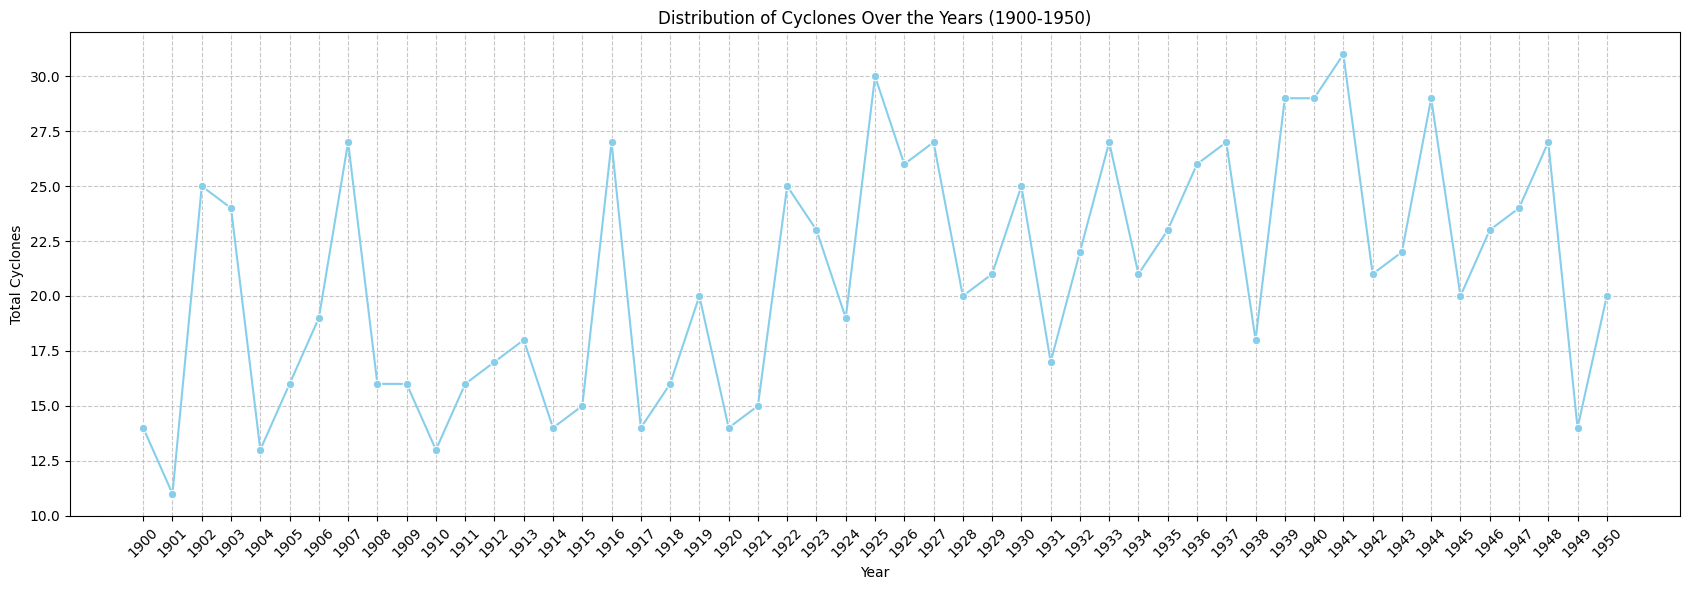

In [44]:
filtered_df = df[(df['year'] >= 1900) & (df['year'] <= 1950)]

year_sum = filtered_df.groupby('year')['frequency'].sum().reset_index()

plt.figure(figsize=(17, 6))
sns.lineplot(data=year_sum, x='year', y='frequency', marker='o', color='skyblue')
plt.title('Distribution of Cyclones Over the Years (1900-1950)')
plt.xlabel('Year')
plt.ylabel('Total Cyclones')
plt.xticks(year_sum['year'],rotation=45)
plt.grid(axis= 'both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

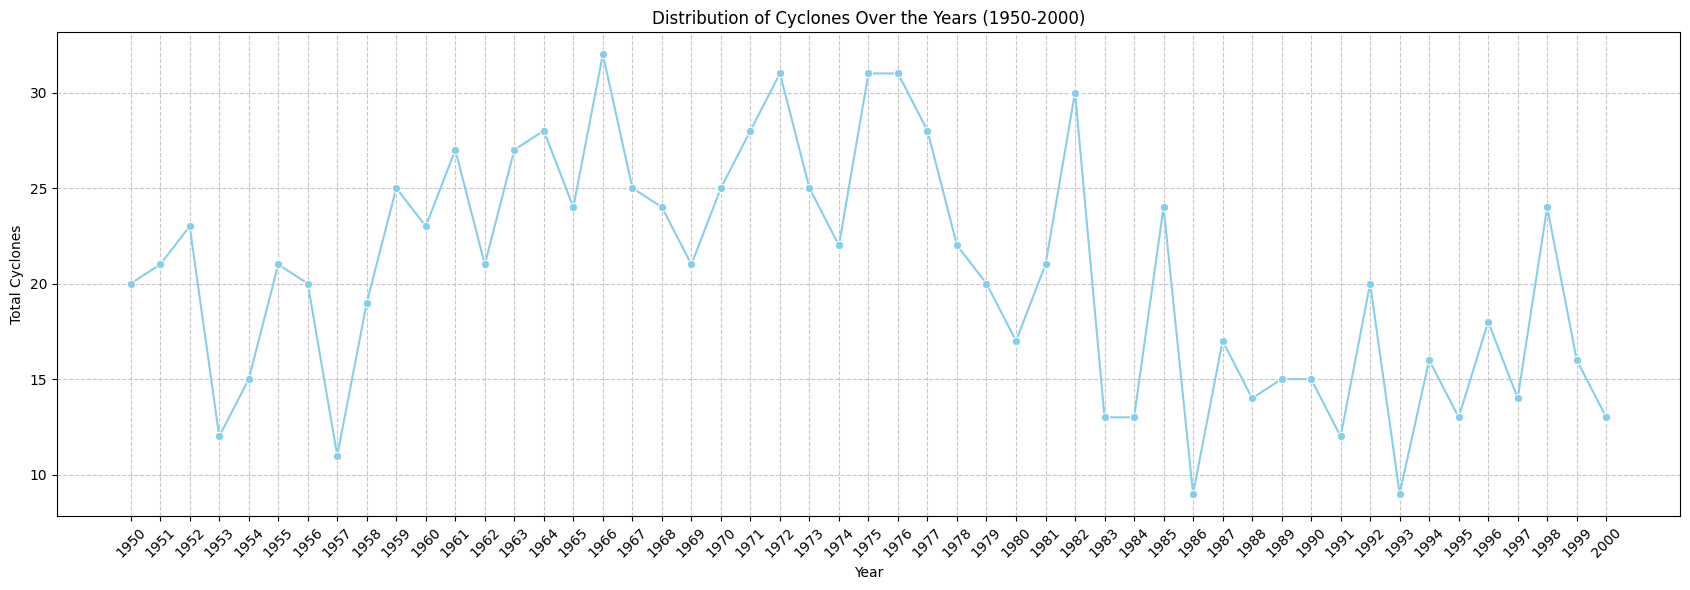

In [70]:
filtered_df2 = df[(df['year'] >= 1950) & (df['year'] <= 2000)]

year_sum = filtered_df2.groupby('year')['frequency'].sum().reset_index()

plt.figure(figsize=(17, 6))
sns.lineplot(data=year_sum, x='year', y='frequency', marker='o', color='skyblue')
plt.title('Distribution of Cyclones Over the Years (1950-2000)')
plt.xlabel('Year')
plt.ylabel('Total Cyclones')
plt.xticks(year_sum['year'],rotation=45)
plt.grid(axis= 'both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

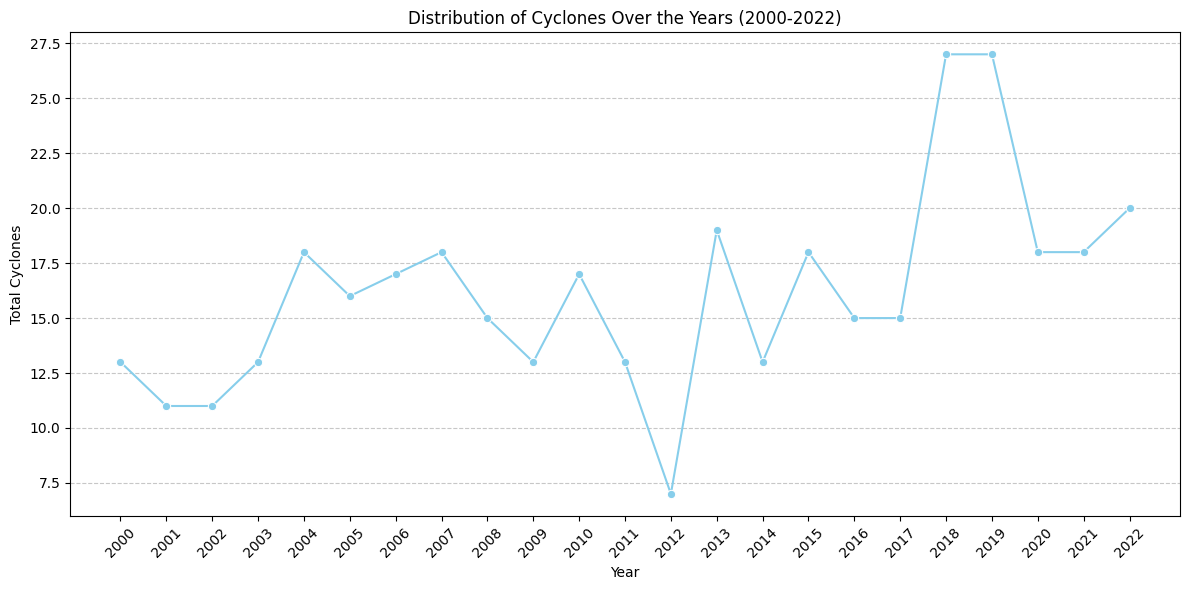

In [71]:
filtered_df3 = df[(df['year'] >= 2000) & (df['year'] <= 2022)]

year_sum = filtered_df3.groupby('year')['frequency'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=year_sum, x='year', y='frequency', marker='o', color='skyblue')
plt.title('Distribution of Cyclones Over the Years (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Total Cyclones')
plt.xticks(year_sum['year'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Years with Most and least number of cyclones overall

In [46]:
year_counts = df.groupby('year')['frequency'].sum()

max_year = year_counts.idxmax()
max_cyclones = year_counts.max()

min_year = year_counts.idxmin()
min_cyclones = year_counts.min()

print(f"The year with the highest number of cyclones is {max_year} with {max_cyclones} cyclones.")
print(f"The year with the lowest number of cyclones is {min_year} with {min_cyclones} cyclones.")

The year with the highest number of cyclones is 1966 with 32 cyclones.
The year with the lowest number of cyclones is 2012 with 7 cyclones.


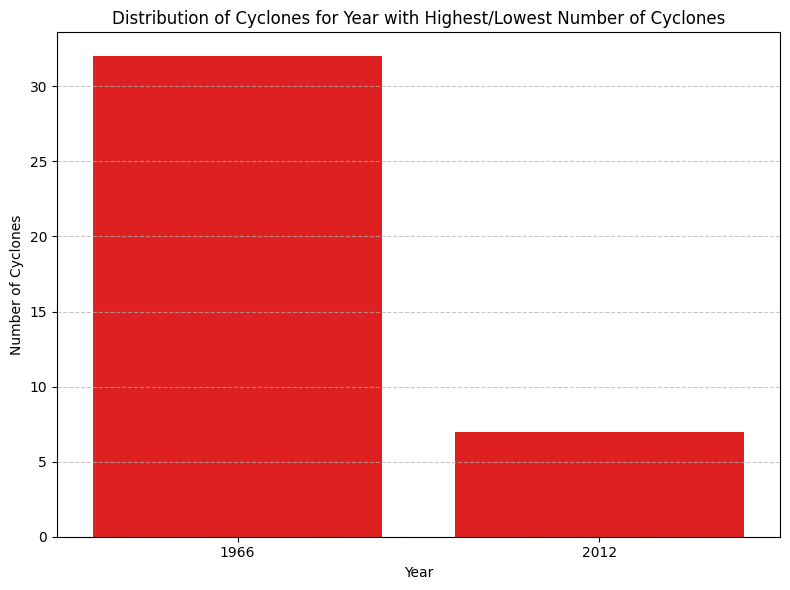

In [47]:
year_counts = df.groupby('year')['frequency'].sum().reset_index()

max_year = year_counts.loc[year_counts['frequency'].idxmax()]
min_year = year_counts.loc[year_counts['frequency'].idxmin()]

selected_years = year_counts.loc[(year_counts['year'] == max_year['year']) | (year_counts['year'] == min_year['year'])]

plt.figure(figsize=(8, 6))
sns.barplot(data=selected_years, x='year', y='frequency', color='red')
plt.title('Distribution of Cyclones for Year with Highest/Lowest Number of Cyclones')
plt.xlabel('Year')
plt.ylabel('Number of Cyclones')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Areas most prone to Cyclones

In [48]:
area_counts = df.groupby('area')['frequency'].sum().reset_index()

most_prone_areas = area_counts.sort_values(by='frequency', ascending=False)

print("Top 5 Most Prone Areas to Cyclones:")
print(most_prone_areas.head())

Top 5 Most Prone Areas to Cyclones:
            area  frequency
1  Bay of Bengal       2006
0    Arabian Sea        461
2           Land        161


In [65]:
cyclone_types = df['cyclone_type'].unique()

print("Different types of cyclones recorded in the dataset:")
print(cyclone_types)

Different types of cyclones recorded in the dataset:
['Cyclonic Disturbances' 'Cyclones' 'Severe Cyclones']


## Most commonly occurring cyclones
* These are called cyclonic disturbances which refers to their trivial nature 

In [67]:
cyclone_type_frequency = df.groupby('cyclone_type')['frequency'].sum()

most_common_cyclone_type = cyclone_type_frequency.idxmax()
count_most_common_cyclone_type = cyclone_type_frequency.max()

print(f"The most common cyclone type is '{most_common_cyclone_type}' with a total frequency of {count_most_common_cyclone_type}.")

The most common cyclone type is 'Cyclonic Disturbances' with a total frequency of 1622.


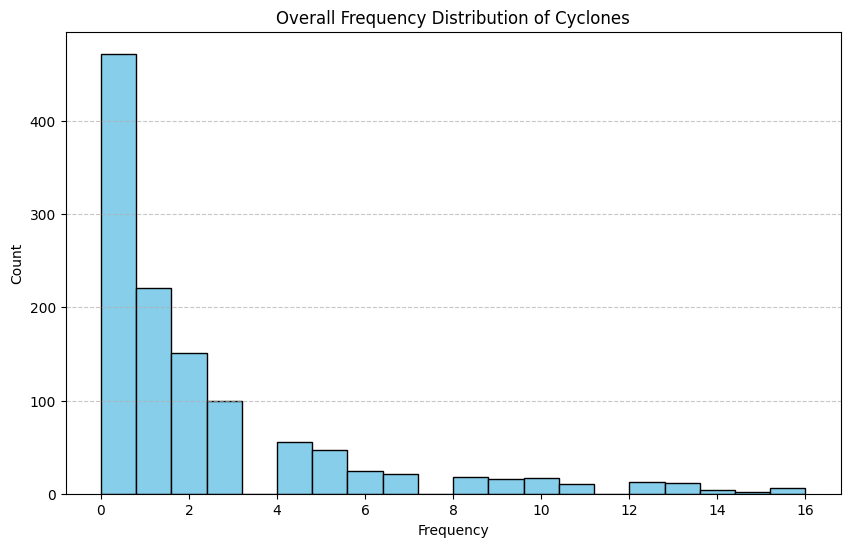

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(df['frequency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Overall Frequency Distribution of Cyclones')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Dealing with outliers
* The identified outliers represent instances where the frequency of cyclones is significantly higher than the typical range observed in the dataset. These outliers could indicate unusual or extreme weather events that occurred during those years in the specified areas.
* For example, in the provided data, the highest frequency of cyclones recorded was 10 in the Bay of Bengal region in 2022. Similarly, there are instances of 8 or 9 cyclones recorded in various years and areas, which are considerably higher than the median or mean frequency observed in the dataset.
* These outliers could be due to various factors such as climatic conditions, geographical features, or data recording anomalies. Further investigation into these outliers may provide insights into the underlying causes or patterns associated with extreme cyclone occurrences.








In [69]:

Q1 = df['frequency'].quantile(0.25)
Q3 = df['frequency'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['frequency'] < lower_bound) | (df['frequency'] > upper_bound)]

print("Outliers in terms of cyclone frequency:")
print(outliers)

Outliers in terms of cyclone frequency:
      year           area           cyclone_type  frequency  \
0     2022  Bay of Bengal  Cyclonic Disturbances         10   
37    2019    Arabian Sea  Cyclonic Disturbances          8   
48    2018  Bay of Bengal  Cyclonic Disturbances          9   
60    2017  Bay of Bengal  Cyclonic Disturbances          8   
108   2013  Bay of Bengal  Cyclonic Disturbances          8   
...    ...            ...                    ...        ...   
1536  1894  Bay of Bengal  Cyclonic Disturbances          8   
1548  1893  Bay of Bengal  Cyclonic Disturbances         10   
1552  1893  Bay of Bengal               Cyclones          9   
1560  1892  Bay of Bengal  Cyclonic Disturbances          8   
1572  1891  Bay of Bengal  Cyclonic Disturbances          9   

                             units  
0     frequency in absolute number  
37    frequency in absolute number  
48    frequency in absolute number  
60    frequency in absolute number  
108   frequency in